In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

In [2]:
# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

In [3]:
#import necessery package
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score,confusion_matrix,classification_report)
import warnings
warnings.filterwarnings('ignore')

In [4]:
data=pd.read_csv('student intervation.csv')
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes
5,GP,M,16,U,LE3,T,4,3,services,other,...,yes,no,5,4,2,1,2,5,10,yes
6,GP,M,16,U,LE3,T,2,2,other,other,...,yes,no,4,4,4,1,1,3,0,yes
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,no,no,4,1,4,1,1,1,6,no
8,GP,M,15,U,LE3,A,3,2,services,other,...,yes,no,4,2,2,1,1,1,0,yes
9,GP,M,15,U,GT3,T,3,4,other,other,...,yes,no,5,5,1,1,1,5,0,yes


# Data Exploration

In [6]:
data.shape

(395, 31)

In [7]:
type(data)

pandas.core.frame.DataFrame

In [8]:
#total no of student
print('Total no of student',data.shape[0])

Total no of student 395


In [9]:
#no of features
print('Total no of features',data.shape[1])

Total no of features 31


In [10]:
#passing student
passed=data.loc[data.passed == 'yes','passed']
passed.shape

(265,)

In [11]:
print('No of Passing Student',passed.shape)

No of Passing Student (265,)


In [12]:
#failed student
failed=data.loc[data.passed == 'no','passed']
failed.shape

(130,)

In [13]:
#Calculate graduation rate
n_passed = passed.shape[0]
n_failed = failed.shape[0]
total = float(n_passed + n_failed)
grad_rate = float(n_passed * 100 / total)

In [14]:
print("Graduation rate of the class: {:.2f}%".format(grad_rate))

Graduation rate of the class: 67.09%


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [30]:
data.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
passed        object
dtype: object

In [31]:
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
passed        0
dtype: int64

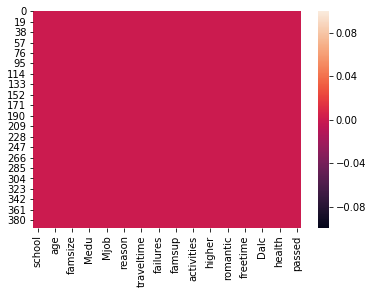

In [32]:
#plotting to check null value
sns.heatmap(data.isnull())

In [36]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'passed'],
      dtype='object')

In [16]:
#last column name
data.columns[-1]

'passed'

# Data Preprocessing

In [5]:
#converting categorical value to numerical value
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [6]:
for col in data.columns:
    data[col]=le.fit_transform(data[col])
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,0,0,3,1,0,0,4,4,0,4,...,0,0,3,2,3,0,0,2,6,0
1,0,0,2,1,0,1,1,1,0,2,...,1,0,4,2,2,0,0,2,4,0
2,0,0,0,1,1,1,1,1,0,2,...,1,0,3,2,1,1,2,2,10,1
3,0,0,0,1,0,1,4,2,1,3,...,1,1,2,1,1,0,0,4,2,1
4,0,0,1,1,0,1,3,3,2,2,...,0,0,3,2,1,0,1,4,4,1


In [7]:
#find the corelation between the variables
data.corr()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
school,1.000000,-0.012286,0.377610,-0.279797,0.064866,0.045923,-0.133333,-0.079807,-0.056670,0.018974,...,-0.133578,0.060700,-0.047926,0.032988,-0.007152,0.114209,0.065087,-0.042651,-0.093938,-0.031254
sex,-0.012286,1.000000,-0.028606,-0.028504,0.089862,0.023443,0.078228,0.034878,0.191421,0.084957,...,0.044113,-0.102023,0.058971,0.238744,0.075897,0.268171,0.274194,0.143588,-0.050376,0.070618
age,0.377610,-0.028606,1.000000,-0.146722,0.037847,0.029598,-0.163658,-0.163438,-0.069104,-0.035191,...,-0.112094,0.164669,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.189428,-0.179645
address,-0.279797,-0.028504,-0.146722,1.000000,0.072472,-0.042572,0.138804,0.072178,0.108818,-0.001911,...,0.216842,0.005257,0.014258,0.034878,0.068835,-0.093494,-0.101126,-0.040355,-0.008829,0.052282
famsize,0.064866,0.089862,0.037847,0.072472,1.000000,-0.149612,-0.043068,-0.058879,0.071386,-0.084448,...,0.000720,0.034395,-0.022776,0.017695,0.023064,0.101521,0.103425,-0.028992,0.049628,0.041842
Pstatus,0.045923,0.023443,0.029598,-0.042572,-0.149612,1.000000,-0.123565,-0.088730,-0.054476,0.033892,...,0.070074,-0.040451,0.025179,0.038717,0.003459,-0.030590,0.006045,0.022307,-0.125566,-0.044050
Medu,-0.133333,0.078228,-0.163658,0.138804,-0.043068,-0.123565,1.000000,0.623455,0.454805,0.157920,...,0.201463,0.039681,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.114062,0.115396
Fedu,-0.079807,0.034878,-0.163438,0.072178,-0.058879,-0.088730,0.623455,1.000000,0.243327,0.200169,...,0.127507,0.015602,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024176,0.108057
Mjob,-0.056670,0.191421,-0.069104,0.108818,0.071386,-0.054476,0.454805,0.243327,1.000000,0.196758,...,0.216969,-0.062999,0.038584,0.114321,0.003169,0.076076,-0.012051,0.065220,0.062613,0.026592
Fjob,0.018974,0.084957,-0.035191,-0.001911,-0.084448,0.033892,0.157920,0.200169,0.196758,1.000000,...,0.035777,-0.000583,0.013709,-0.047475,0.010340,0.077897,0.070024,-0.018058,-0.009792,0.028309


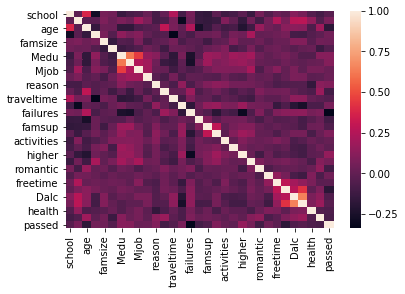

In [20]:
sns.heatmap(data.corr())

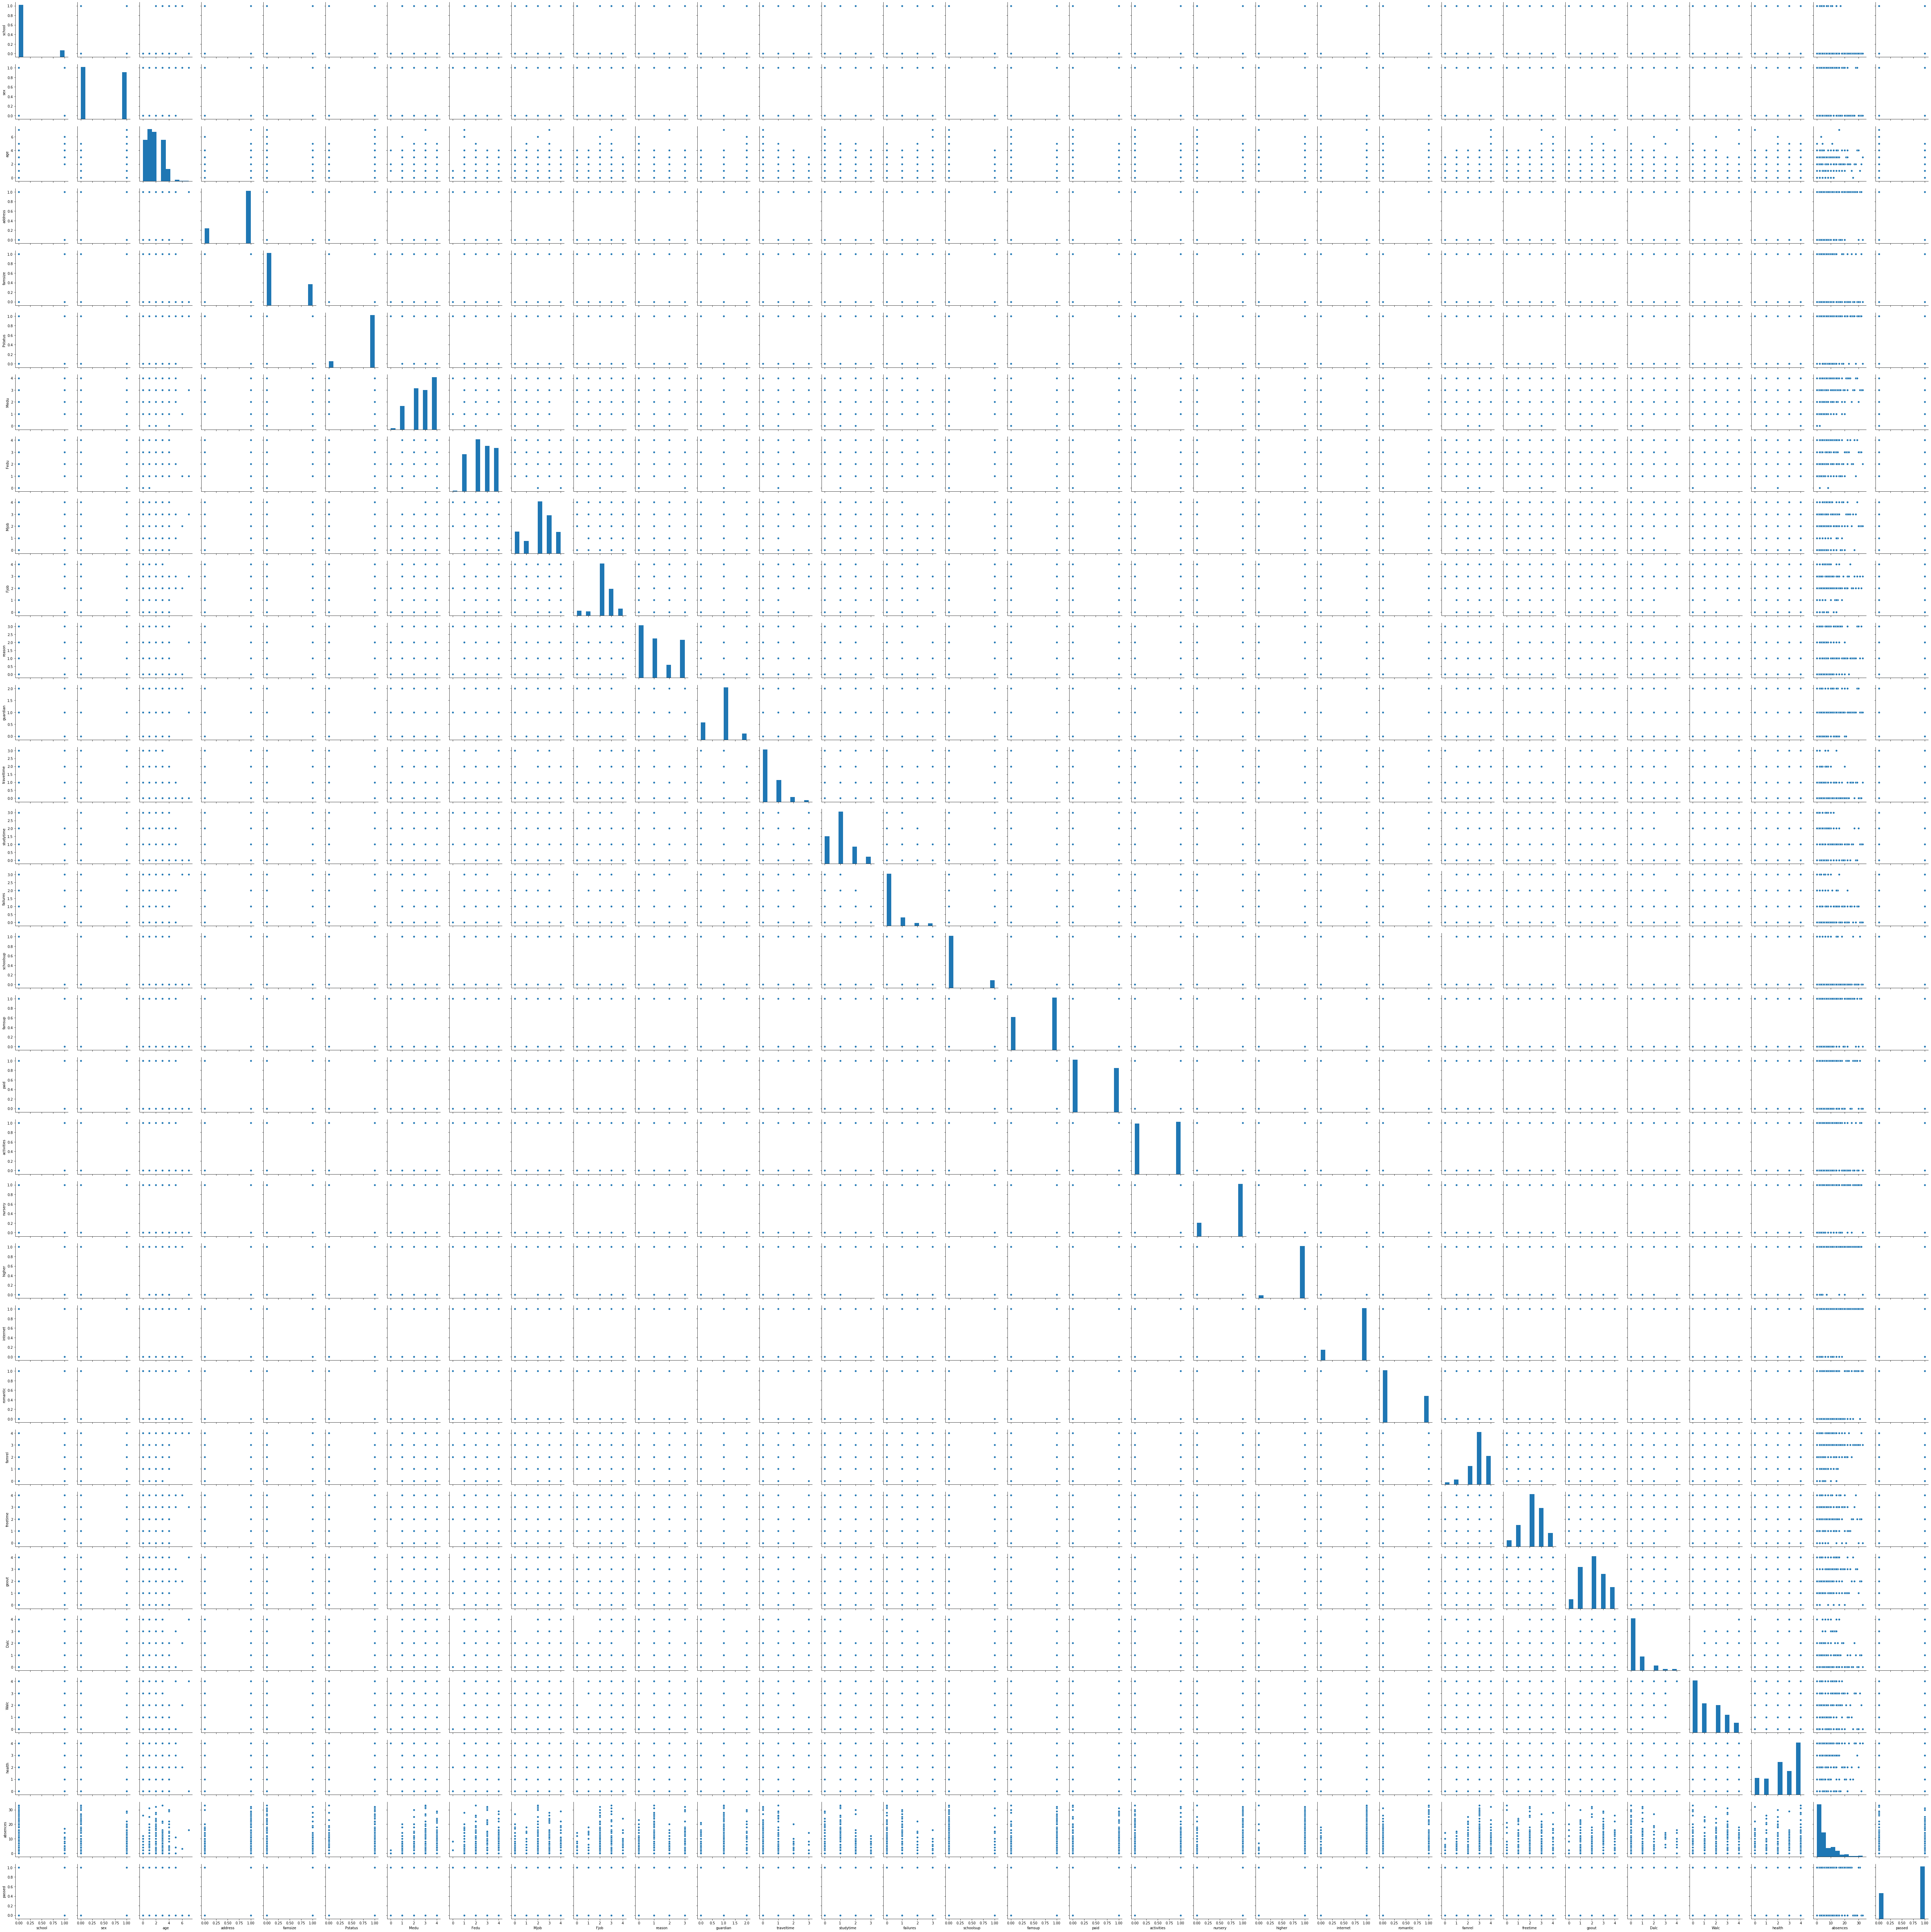

In [46]:
#bivariate analysis
sns.pairplot(data)

In [47]:
#counterr target variables
from collections import Counter
Counter(data['passed'])

Counter({0: 130, 1: 265})

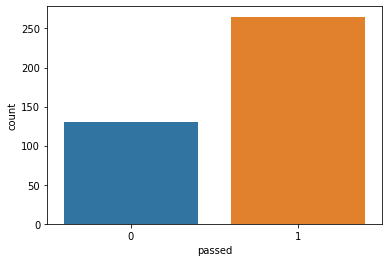

In [48]:
#plotting target variables
sns.countplot(x='passed',data=data)

In [49]:
from scipy.stats import skew
skew(data)

array([ 2.39139325,  0.1064797 ,  0.46449764, -1.33239683,  0.93306282,
       -2.59806958, -0.31717037, -0.03155169, -0.33391414, -0.36092604,
        0.40801077, -0.11112162,  1.60092001,  0.62973912,  2.37795149,
        2.21209264, -0.46252649,  0.16767479, -0.0354486 , -1.46099452,
       -4.09918691, -1.78478469,  0.70308277, -0.94826313, -0.16272978,
        0.11605954,  2.18243371,  0.60963363, -0.49272334,  1.72376872,
       -0.72734282])

# Outlier Treatment

In [8]:
#outlier treatment
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(data))
z

array([[0.3630498 , 0.94817639, 1.02304645, ..., 0.39928949, 0.08880926,
        1.42774701],
       [0.3630498 , 0.94817639, 0.23837976, ..., 0.39928949, 0.22163018,
        1.42774701],
       [0.3630498 , 0.94817639, 1.33095364, ..., 0.39928949, 0.70968814,
        0.7004042 ],
       ...,
       [2.75444305, 1.05465609, 3.37704655, ..., 0.39928949, 0.3768499 ,
        1.42774701],
       [2.75444305, 1.05465609, 1.02304645, ..., 1.04106985, 0.84250906,
        0.7004042 ],
       [2.75444305, 1.05465609, 1.80771315, ..., 1.04106985, 0.06641046,
        1.42774701]])

In [9]:
threshold=3
print(np.where(z>3))
df=data[(z<3).all(axis=1)]
df

(array([  2,  18,  25,  29,  40,  61,  61,  66,  66,  74,  78,  78, 100,
       103, 108, 108, 127, 127, 134, 144, 146, 148, 149, 149, 150, 150,
       153, 153, 157, 160, 163, 164, 164, 164, 165, 166, 173, 183, 184,
       205, 206, 207, 223, 228, 236, 239, 247, 247, 247, 247, 250, 252,
       269, 276, 276, 280, 299, 307, 311, 315, 327, 327, 349, 350, 352,
       357, 361, 371, 375, 389, 392, 392], dtype=int32), array([14, 14, 23, 26, 29, 12, 26, 23, 26, 29, 14, 20, 26, 29, 12, 23, 14,
       20, 12, 14, 14, 20, 12, 14, 14, 20, 14, 20, 14, 20, 20, 12, 14, 20,
       20, 20, 14, 29, 23, 29, 14, 23, 26, 12, 26, 20,  2, 14, 20, 26, 20,
       20, 20, 20, 29, 29, 23, 29, 20, 29, 12, 26, 26, 14, 20, 23, 20, 20,
       12, 23,  2, 14], dtype=int32))


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,0,0,3,1,0,0,4,4,0,4,...,0,0,3,2,3,0,0,2,6,0
1,0,0,2,1,0,1,1,1,0,2,...,1,0,4,2,2,0,0,2,4,0
3,0,0,0,1,0,1,4,2,1,3,...,1,1,2,1,1,0,0,4,2,1
4,0,0,1,1,0,1,3,3,2,2,...,0,0,3,2,1,0,1,4,4,1
5,0,1,1,1,1,1,4,3,3,2,...,1,0,4,3,1,0,1,4,10,1
6,0,1,1,1,1,1,2,2,2,2,...,1,0,3,3,3,0,0,2,0,1
7,0,0,2,1,0,0,4,4,2,4,...,0,0,3,0,3,0,0,0,6,0
8,0,1,0,1,1,0,3,2,3,2,...,1,0,3,1,1,0,0,0,0,1
9,0,1,0,1,0,1,3,4,2,2,...,1,0,4,4,0,0,0,4,0,1
10,0,0,0,1,0,1,4,4,4,1,...,1,0,2,2,2,0,1,1,0,0


In [23]:
data.shape

(395, 31)

In [24]:
df.shape

(339, 31)

After the application of outlier treatment the shape of the new data is less than the previous data.

# Implementation of input and output data

In [10]:
x=data.drop('passed',axis=1)
y=data['passed']

In [11]:
#Standard Scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

Due to standard scaler ,the highly skewed data will be normalised 

In [12]:
print(x.shape)
print(y.shape)

(395, 30)
(395,)


In [13]:
#splitting the data into test and train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.22, random_state = 42)

In [14]:
# Show the results of the split
print("Training set has {} samples.".format(x_train.shape[0]))
print("Testing set has {} samples.".format(x_test.shape[0]))

Training set has 308 samples.
Testing set has 87 samples.


# Explanation Of The Model

In [34]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print(accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

71.26436781609196
[[12 20]
 [ 5 50]]
              precision    recall  f1-score   support

           0       0.71      0.38      0.49        32
           1       0.71      0.91      0.80        55

    accuracy                           0.71        87
   macro avg       0.71      0.64      0.64        87
weighted avg       0.71      0.71      0.69        87



# Boosting

In [24]:
#Create adaboost classifer object
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)

In [25]:
# Train Adaboost Classifer
model = abc.fit(x_train, y_train)

In [26]:
#Predict the response for test dataset
y_pred = model.predict(x_test)

In [27]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7241379310344828


In [28]:
from sklearn.ensemble import AdaBoostClassifier

In [29]:
lg=LogisticRegression()
abc =AdaBoostClassifier(n_estimators=50, base_estimator=lg,learning_rate=1)

In [30]:
# Train Adaboost Classifer
model = abc.fit(x_train, y_train)

In [31]:
#Predict the response for test dataset
y_pred = model.predict(x_test)

In [38]:
# Model Accuracy, how often is the classifier correct?
x=print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.735632183908046


In [35]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)

predgnb=gnb.predict(x_test)
print(accuracy_score(y_test,predgnb)*100)
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

71.26436781609196
[[12 20]
 [ 5 50]]
              precision    recall  f1-score   support

           0       0.71      0.38      0.49        32
           1       0.71      0.91      0.80        55

    accuracy                           0.71        87
   macro avg       0.71      0.64      0.64        87
weighted avg       0.71      0.71      0.69        87



In [39]:
def svmkernel(ker):
    svc=SVC(kernel=ker)
    svc.fit(x_train,y_train)
    svc.score(x_train,y_train)
    predsvc=svc.predict(x_test)
    print(accuracy_score(y_test,predsvc))
    print(confusion_matrix(y_test,predsvc))
    print(classification_report(y_test,predsvc))

In [40]:
svmkernel('rbf')

0.6781609195402298
[[ 6 26]
 [ 2 53]]
              precision    recall  f1-score   support

           0       0.75      0.19      0.30        32
           1       0.67      0.96      0.79        55

    accuracy                           0.68        87
   macro avg       0.71      0.58      0.55        87
weighted avg       0.70      0.68      0.61        87



In [41]:
svmkernel('poly')

0.6436781609195402
[[ 4 28]
 [ 3 52]]
              precision    recall  f1-score   support

           0       0.57      0.12      0.21        32
           1       0.65      0.95      0.77        55

    accuracy                           0.64        87
   macro avg       0.61      0.54      0.49        87
weighted avg       0.62      0.64      0.56        87



In [42]:
svmkernel('linear')

0.6781609195402298
[[ 8 24]
 [ 4 51]]
              precision    recall  f1-score   support

           0       0.67      0.25      0.36        32
           1       0.68      0.93      0.78        55

    accuracy                           0.68        87
   macro avg       0.67      0.59      0.57        87
weighted avg       0.68      0.68      0.63        87



In [47]:
# TODO: Import 'GridSearchCV' and 'make_scorer'
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer


In [84]:
# Create the parameters list you wish to tune
C = [0.001, 0.01, 0.1, 1, 10,20,30,40,50]
solver = ['sag']
max_iter = [100]
param_grid = dict(C=C, solver=solver, max_iter=max_iter)

In [85]:
# Initialize the classifier
clf = LogisticRegression()

In [86]:
grid_search = GridSearchCV(estimator = lg,
                           param_grid = param_grid,
                           scoring = 'accuracy',
                           cv = 15,
                           n_jobs = -1)

In [87]:
grid_search = grid_search.fit(x_train, y_train)

In [88]:
accuracy = grid_search.best_score_

In [89]:
accuracy

0.7012987012987013

In [90]:
grid_search.best_params_

{'C': 0.01, 'max_iter': 100, 'solver': 'sag'}

In [92]:
#putting the best estimator
lg=LogisticRegression (C=0.01,max_iter= 100, solver='sag')
lg.fit(x_train,y_train)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [94]:
# Predicting the Test set results
y_pred = lg.predict(x_test)

In [95]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [96]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)

In [97]:
accuracy

0.6436781609195402

In [100]:
lg.score(x,y)

0.7063291139240506

After the application of Different kind of 'Machine Learning Algorithm ',We found out that Lg and Naive Baise performs 71% accuracy and after that to increase the acuracy of the model i put grid search cv but it gave 70% accuracy 

In [44]:
from sklearn.externals import joblib

In [45]:
joblib.dump(abc, "Project27_student intervation.pkl")

['Project27_student intervation.pkl']

In [46]:
x= joblib.load("Project27_student intervation.pkl")

In [47]:
x.predict(x_test)

array([0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1])